<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Scikit-Learn介紹

## Scikit-Learn中的資料表示法

### 把資料當作是表格

基本的表格為二維網狀資料，列表示資料集中個別的元素，欄表示和這些元素相關的數量。

In [17]:
# 從seaborn匯入鳶尾花(Iris)資料集
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


每一資料列代表的是單一朵被觀察的花，而列的數目就是在此資料集中所有花的數量。一般來說，會把這個矩陣的所有列稱為樣本*samples*，而列的總數就是``n_samples``。

同樣的，資料中的每一欄代表每一個用來描述這個sample的部分量化資訊。一般來說，會把此矩陣的所有欄稱為*features*，而欄的總數就是``n_features``。

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


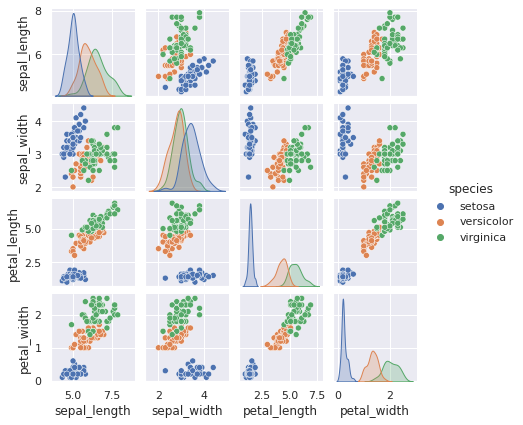

In [18]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5); # hue:將資料進行分類, size: 圖的大小

In [19]:
# 從DataFrame中擷取出特徵矩陣以及目標陣列
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [20]:
y_iris = iris['species']
y_iris.shape

(150,)

#### 特徵矩陣(Features matrix, X)

表格排列的樣子使得資訊可以被想成是一個二維的數值陣列或矩陣，此種表格稱之為特徵矩陣*features matrix*。習慣上，此特徵矩陣通常被儲存在``X``的變數中，此特徵矩陣被視為形狀為``[n_samples, n_features]``的二維矩陣，而且大部分都被放在Numpy陣列或是 Pandas ``DataFrame``中，而有一些Scikit-Learn模型也接受SciPy稀疏矩陣。

樣本(也就是列)通常對應到的是資料集所描述的獨立個體。例如: 一朵花

特徵(也就是欄)總是被視為獨特的觀察，此觀察以數值的方式去描述每一個樣本。特徵通常都是實數的數值，但在有些情況下也可以是布林值或離散的資料。

#### 目標陣列(y)

除了特徵矩陣``X``，我們也會使用*標籤(label)*或*目標(target)*陣列，慣例上會把它叫做``y``。目標矩陣通常是一維的，長度是``n_samples``，而且通常被放在Numpy陣列或是Pandas ``Series``中。目標陣列可以是連續的數值或是離散的類別/標籤。雖然有一些Scikit-Learn的評估器可以處理二維``[n_samples, n_targets]``目標陣列型式的多重目標值，還是會以常用的一維目標陣列為主。

有一個經常會被搞混的地方是目標陣列和其他特徵欄的差別。目標陣列通常是我們想要從資料去預測的值:用統計學的術語來說就是應變項(depedent variable)。例如:若要建立一個模型根據其他的測量值去預測花的種類，``species``欄位就可以當作是此種特徵。

預期的特徵和目標值的排列如下:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)


## Scikit-Learn的Estimator API

### 監督式學習範例: 簡單線性迴歸

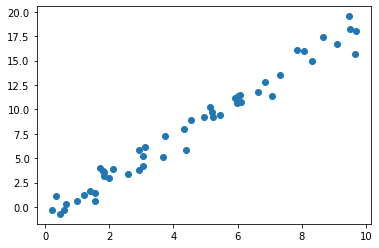

In [1]:
# 呼叫資料
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. 選擇模型的類別

In [2]:
# 選擇線性迴歸
from sklearn.linear_model import LinearRegression

#### 2. 選擇模型的超參數

一旦決定要使用的類別後，要選擇模型的超參數。

以線性迴歸為例子，可以使用``fit_intercept``超參數去實例化``LinearRegression``類別以及指定擬合截距。

In [3]:
model = LinearRegression(fit_intercept=True) # fit_intercept: Whether to calculate the intercept for this model.
model

LinearRegression()

#### 3. 安排資料到特徵矩陣和目標向量

如前面所提，需要一個二維的特徵矩陣和一個一維目標向量。

在此目標變數``y``已經是正確的格式(一個長度為``n_samples``的陣列)，但是我們需要去把資料``x``變成一個大小是``[n_samples, n_features]``的矩陣。

In [4]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. 擬合模型到你的資料中


In [5]:
model.fit(X, y)

LinearRegression()

``fit()``命令會引發一連串和模型相依的內部運算，這些運算的結果會被儲存在模型專屬的屬性中讓使用者可以查詢利用。
在Scikit-Learn中，慣例上，所有在執行``fit()``的過程中學習過的模型參數，後面都會加上一個底線符號。

In [6]:
# 斜率
model.coef_

array([1.9776566])

In [7]:
# 截距
model.intercept_

-0.9033107255311146

#### 5. 預測未知資料的標籤

一旦模型完成訓練後，監督式學習的主要工作就是去評估那些不在訓練資料中的新資料。

In [10]:
xfit = np.linspace(-1, 11) # num = 50，預設產生50個數字

需要把這些x值放到``[n_samples, n_features]``特徵矩陣中，然後才能夠把它餵給模型:

In [13]:
Xfit = xfit[:, np.newaxis] # 為了產生yfit，需要在xfit多一個維度
yfit = model.predict(Xfit)

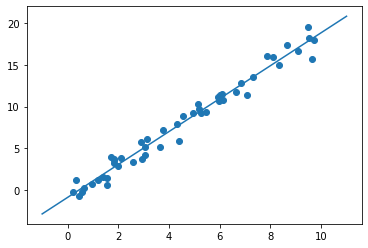

In [14]:
# 把資料和擬合的模型畫在圖表上
plt.scatter(x, y)
plt.plot(xfit, yfit);

### 監督式學習範例: 鳶尾花範例

問題:給一個針對部分鳶尾花訓練過的模型，用在預測剩餘的標籤表現會有多好?

以下用一個極簡單的生成模型，也就是Gaussian naive Bayes，因為它的速度非常快而且不需要選用超參數，在探索是否可以藉由更複雜的模型找出可以改進的內容之前，Gaussian naive Bayes經常是作為baseline分類方法的不錯模型。

In [21]:
# 將資料分割成training set和testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

當資料排列好了之後，可以遵循底下的方式來預測標籤:

In [22]:
from sklearn.naive_bayes import GaussianNB # 1. 選擇模型類別
model = GaussianNB()                       # 2. 實體化模型
model.fit(Xtrain, ytrain)                  # 3. 對資料擬合此模型
y_model = model.predict(Xtest)             # 4. 針對新資料進行預測

使用``accuracy_score``工具檢視預測的標籤和它的真正標籤符合程度之分數:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### 非監督式學習範例: 鳶尾花分類

做一個非監督式學習問題的例子，先看降低鳶尾花資料維度的部分，以使它更容易被視覺化。降低維度常被用於以視覺化為目標的情況下，以下使用主成分分析(principal component analysis)的方式進行。

In [24]:
from sklearn.decomposition import PCA  # 1. 選擇模型類別
model = PCA(n_components=2)            # 2. 使用超參數實體化模型
model.fit(X_iris)                      # 3. 擬合到資料。留意y並不需要設定
X_2D = model.transform(X_iris)         # 4. 轉換資料成為2個維度

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


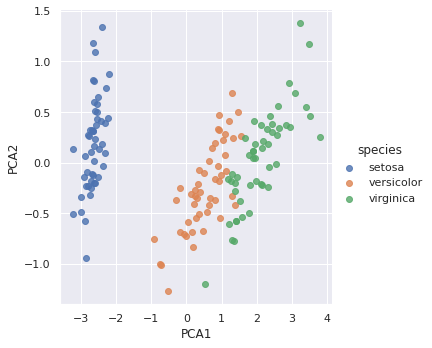

In [25]:
# 初步看結果
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

可看出，物種被分區的非常好，可直接用肉眼初步了解分類，算是一個相對簡單的分類

### 非監督式學習: 鳶尾花集群(clustering)

Clustering嘗試在對沒有任何標籤均沒有任何參考的情況下分成不同的群組。以下使用具有威力的clustering方式Gaussian mixture model (GMM)。

In [27]:
from sklearn import mixture      # 1. 選擇模型類別
model = mixture.GaussianMixture(n_components=3,
            covariance_type='full')  # 2. 使用超參數實體化模型。covariance_type: String describing the type of covariance parameters to use.(‘full’: each component has its own general covariance matrix.)
model.fit(X_iris)                    # 3. 擬合到資料。留意y並不需要設定
y_gmm = model.predict(X_iris)        # 4. 決定出群的標籤

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


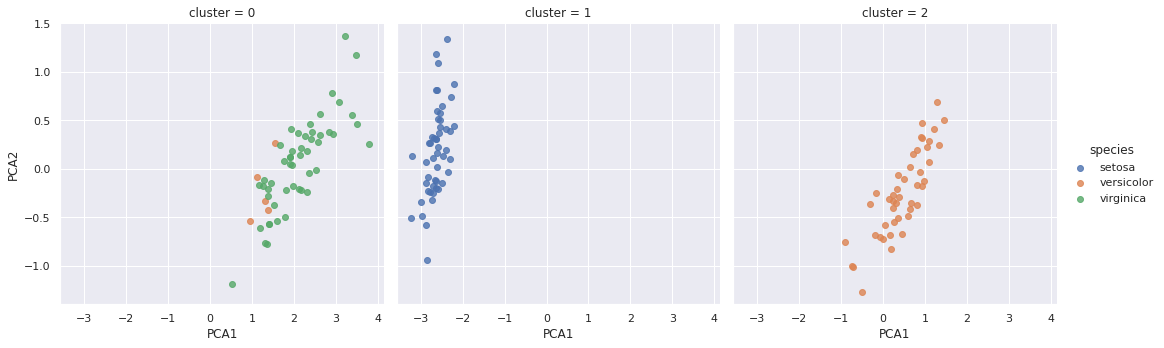

In [28]:
# 加上標籤後畫圖
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

藉由使用群編號分割資料，可以精確地看到GMM演算法可以多好的回復在底層的標籤:*setosa*物種被非常完美的區分在第0個cluster，然而在*versicolor*和*virginica*之間則留下少量的混合部分。這表示就算是沒有專家告訴我們這些物種標籤，用簡單的clustering演算法也可初步告訴我們這些花的分類。
此類型的演算法也可以進一步給專家在領域中，觀察到的樣本間關係的線索。

## 應用: 探索手寫字元

### 載入和視覺化字元資料

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

這些影像資料是一個三維的陣列:共有1797樣本，每一個都是由8x8格的像素所組成。

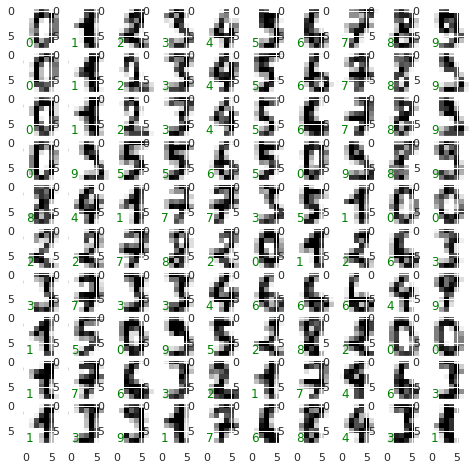

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]}, # 去除xy軸的標籤
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) # 繪製前100個

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

需要二維的表示法``[n_samples, n_features]``套用在Scikit-learn中，可以透過把每一在影像的像素當做是一個特徵，也就是說，藉由把像素陣列平面化，讓一個長度為64的像素值陣列可以表示每一個數字元。接著還需要一個目標陣列，用來放每一個數字元之前定義的標籤。這兩個值可以被建立到數字元資料集中，分別放在``data``和``target``屬性。

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

如此就變成1797個樣本以及64個特徵了

### 非監督式學習: 維度降低

接下來要在64維的參數空間中視覺化資料點就必須要先降低維度。

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2) # 使用Isomap降低維度
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

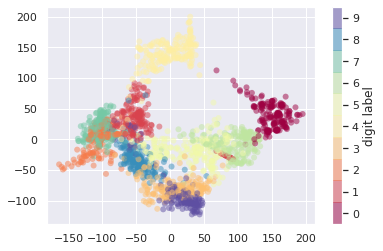

In [36]:
# 畫圖
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

透過圖片了解到這個較大的64維度空間被分隔成不同數字表現的好壞，例如: 0(黑色)和1(紫色)在參數空間中重疊的部分非常少。因為0的圖像在中間都是空的，而1的圖像則是大部分都是畫在中間一豎的地方。另一方面，也可以了解到有一些人在寫1的時候會在上面加個帽子，讓1和4有點相似。

### 數字元的分類

將iris資料分成train和test兩組，然後擬合Gaussian naive Bayes模型

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0) # 預設切為0.75:0.25，If train_size is also None, it will be set to 0.25.

In [38]:
# 預測
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [39]:
# 評估模型的準確率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

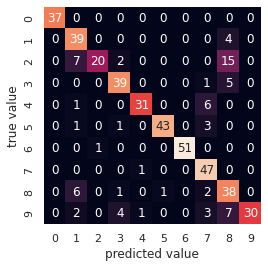

In [40]:
# 繪製混淆矩陣confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

看出錯誤分類點的傾向:例如:2很容易被誤判成1或8

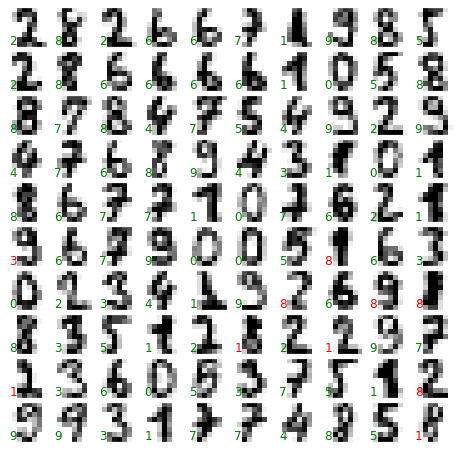

In [41]:
# 綠色:預測正確、紅色:預測錯誤
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')